In [2]:
library(dplyr)
library(ggplot2)
library(reshape2)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [6]:
enrollment <-read.csv("Data/collegeenrollment.csv")

In [7]:
head(enrollment)

College,Degree,MajorCode,MajorName,RaceGender,Race,Gender,Count,Total
College of Agri Sci and Natl Resources,B1BC,BIOC,Biochemistry,NonResidentAlienMale,NonResidentAlien,Male,3,97
College of Agri Sci and Natl Resources,B1AS,ASCI,Animal Science,NonResidentAlienMale,NonResidentAlien,Male,0,338
College of Agri Sci and Natl Resources,B1FW,FWL,Fisheries and Wildlife,NonResidentAlienMale,NonResidentAlien,Male,0,191
College of Agri Sci and Natl Resources,B1AP,APSC,Applied Science,NonResidentAlienMale,NonResidentAlien,Male,1,71
College of Agri Sci and Natl Resources,B1HO,HORT,Horticulture,NonResidentAlienMale,NonResidentAlien,Male,1,52
College of Agri Sci and Natl Resources,B1ED,AEDU,Agricultural Education,NonResidentAlienMale,NonResidentAlien,Male,0,103


In [8]:
majors <- enrollment %>% 
    group_by(College, MajorName, Gender) %>%
    summarize(
       Total=sum(Count)
    )

In [9]:
majors_bubble <- dcast(majors, College + MajorName ~ Gender)

Using Total as value column: use value.var to override.


In [10]:
head(majors_bubble)

College,MajorName,Female,Male
College of Agri Sci and Natl Resources,Agribusiness,66,175
College of Agri Sci and Natl Resources,Agricultural & Env Sci Comm,27,5
College of Agri Sci and Natl Resources,Agricultural Economics,23,109
College of Agri Sci and Natl Resources,Agricultural Education,80,23
College of Agri Sci and Natl Resources,Agricultural Journalism,2,0
College of Agri Sci and Natl Resources,Agronomy,24,167


In [11]:
bubble <- majors_bubble %>% 
    mutate(
       Total = Male+Female,
       Difference = abs(Male-Female)
    )

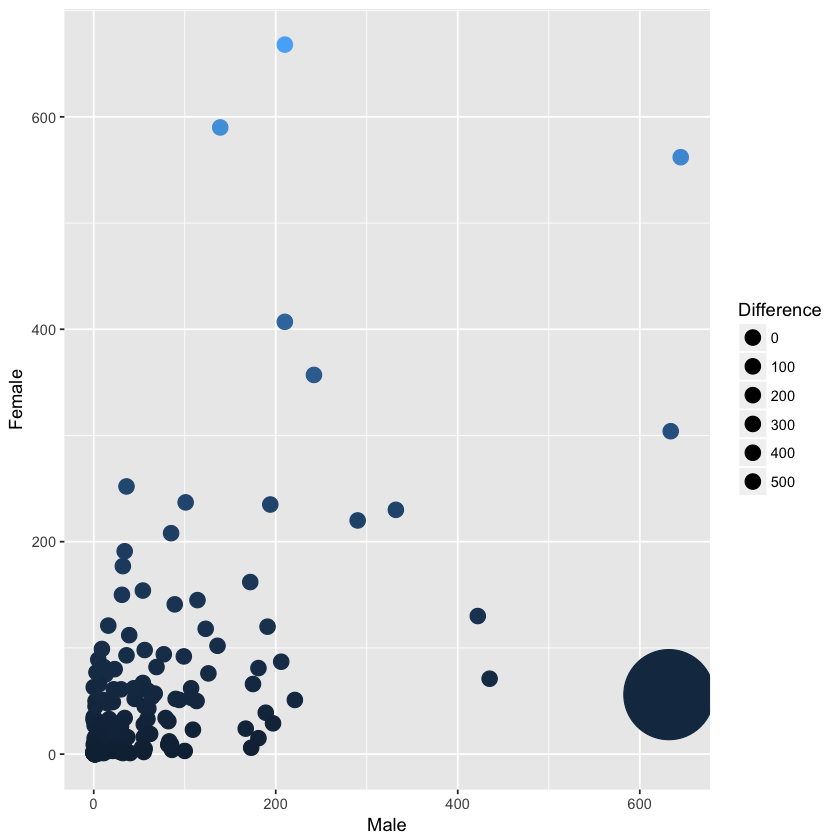

In [12]:
ggplot(bubble, aes(x = Male, y = Female, size=Difference,color=Female)) +
geom_point() +
scale_size_continuous( trans="exp",range=c(4, 25)) +
  scale_colour_continuous(guide = FALSE) 

In [13]:
library ("RColorBrewer")

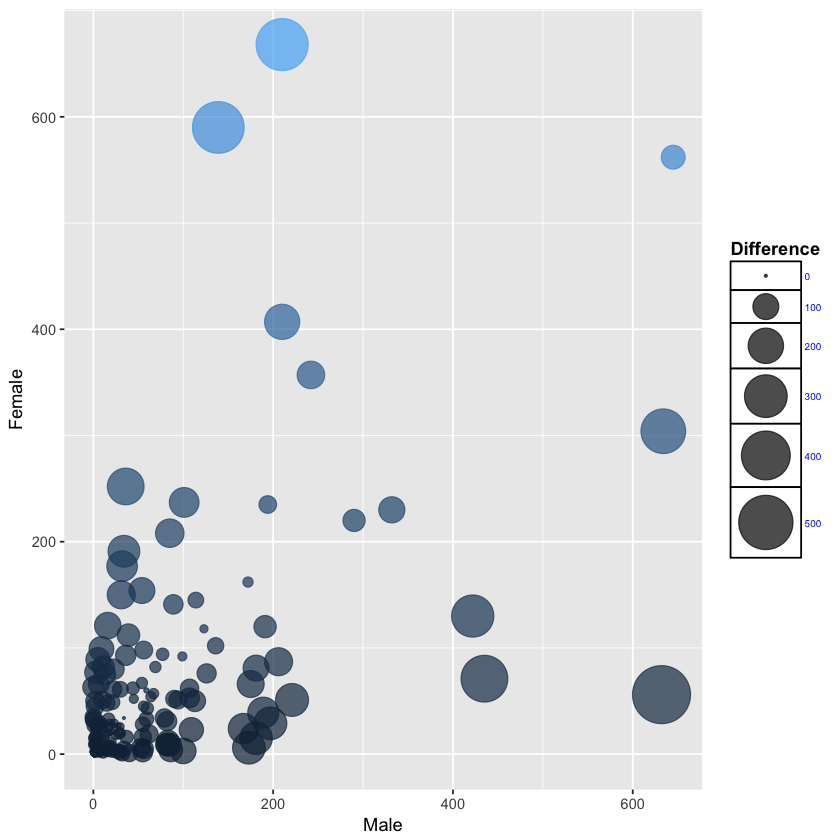

In [16]:
ggplot(bubble, aes(x = Male, y = Female, size=Difference, color=Female)) +
geom_point(alpha=0.7) +
scale_size_continuous(range=c(0.5, 16)) +
scale_colour_continuous(guide = FALSE) +
theme(legend.key = element_rect(fill = "white", colour = "black"), legend.text = element_text(size = 6, colour = "blue"), legend.title = element_text(face = "bold"))